<a href="https://colab.research.google.com/github/devandrepascoa/Colab_Notebooks/blob/master/MNIST_PCA_VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow.keras as keras
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.linalg import eigh

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0],-1))
print(x_train.shape)
standardized_data = StandardScaler().fit_transform(x_train)
print(standardized_data.shape)

(60000, 784)
(60000, 784)


In [14]:
covar_matrix = np.matmul(standardized_data.T,standardized_data)
print(covar_matrix.shape)

(784, 784)


In [15]:
values, vectors = eigh(covar_matrix)
vectors = vectors.T
pca_1 = vectors[783]
pca_2 = vectors[782]
pca_3 = vectors[781]
vectors = np.array([pca_3,pca_2,pca_1])
print(vectors.shape)

(3, 784)


In [0]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, standardized_data.T)

In [17]:
import pandas as pd
new_coordinates = np.vstack((new_coordinates, y_train)).T
df = pd.DataFrame(data=new_coordinates, columns=("3rd_principal","2nd_principal", "1st_principal", "label"))
print(df.head())

   3rd_principal  2nd_principal  1st_principal  label
0      -0.067560      -4.814790      -0.922159    5.0
1       3.447910      -7.754403       8.708977    0.0
2       6.184114       9.431338       2.328389    4.0
3      -3.690851      -3.746318      -6.582173    1.0
4       6.277947       3.133297      -5.183251    9.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


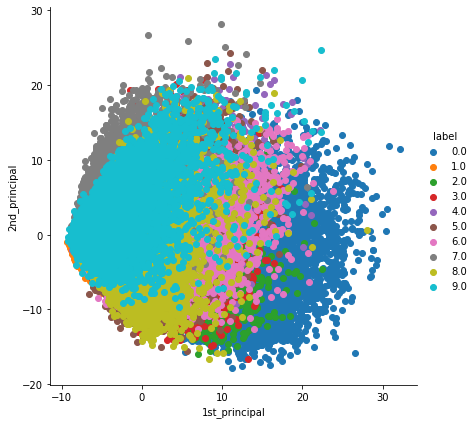

In [18]:
# plotting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(df, hue="label", size=6).map(plt.scatter, "1st_principal", "2nd_principal").add_legend()
plt.show()

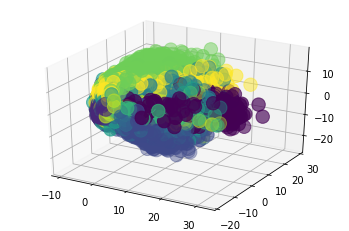

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['1st_principal'], df['2nd_principal'], df['3rd_principal'], c=df['label'], s=180)
ax.set_xscale('linear')

plt.show()
